### MTA Subway Hourly Ridership: 2020-2024

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import requests
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from time import sleep

# API and date range
api_url = 'https://data.ny.gov/resource/wujg-7c2s.json'
limit = 50000
start_date = datetime(2020, 7, 1)
end_date = datetime(2024, 12, 31)

# Container for all raw data
all_data = []

# Loop through each month
current = start_date
while current <= end_date:
    start_str = current.strftime('%Y-%m-%dT00:00:00')
    end_str = (current + relativedelta(months=1) - timedelta(days=1)).strftime('%Y-%m-%dT23:59:59')
    where_clause = f"transit_timestamp between '{start_str}' and '{end_str}'"

    params = {
        '$limit': limit,
        '$where': where_clause
    }

    try:
        response = requests.get(api_url, params=params)
        response.raise_for_status()
        chunk = response.json()

        if chunk:
            all_data.extend(chunk)
            print(f"✔️ {current.strftime('%Y-%m')} — {len(chunk)} records")
        else:
            print(f"⚠️ {current.strftime('%Y-%m')} — No data")

    except Exception as e:
        print(f"❌ Error on {current.strftime('%Y-%m')}: {e}")

    current += relativedelta(months=1)
    sleep(1)  # Avoid throttling

# Convert to DataFrame
df = pd.DataFrame(all_data)
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], errors='coerce')
df['ridership'] = pd.to_numeric(df['ridership'], errors='coerce')

print(f"\n✅ Finished fetching data — Total rows: {df.shape[0]}")
display(df.head())

✔️ 2020-07 — 50000 records
✔️ 2020-08 — 50000 records
✔️ 2020-09 — 50000 records
✔️ 2020-10 — 50000 records
✔️ 2020-11 — 50000 records
✔️ 2020-12 — 50000 records
✔️ 2021-01 — 50000 records
✔️ 2021-02 — 50000 records
✔️ 2021-03 — 50000 records
✔️ 2021-04 — 50000 records
✔️ 2021-05 — 50000 records
✔️ 2021-06 — 50000 records
✔️ 2021-07 — 50000 records
✔️ 2021-08 — 50000 records
✔️ 2021-09 — 50000 records
✔️ 2021-10 — 50000 records
✔️ 2021-11 — 50000 records
✔️ 2021-12 — 50000 records
✔️ 2022-01 — 50000 records
✔️ 2022-02 — 50000 records
✔️ 2022-03 — 50000 records
✔️ 2022-04 — 50000 records
✔️ 2022-05 — 50000 records
✔️ 2022-06 — 50000 records
✔️ 2022-07 — 50000 records
✔️ 2022-08 — 50000 records
✔️ 2022-09 — 50000 records
✔️ 2022-10 — 50000 records
✔️ 2022-11 — 50000 records
✔️ 2022-12 — 50000 records
✔️ 2023-01 — 50000 records
✔️ 2023-02 — 50000 records
✔️ 2023-03 — 50000 records
✔️ 2023-04 — 50000 records
✔️ 2023-05 — 50000 records
✔️ 2023-06 — 50000 records
✔️ 2023-07 — 50000 records
✔

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,georeference
0,2020-07-01,subway,358,"Newkirk Av-Little Haiti (2,5)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.63997,-73.94841,"{'type': 'Point', 'coordinates': [-73.94841, 4..."
1,2020-07-01,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Full Fare,4.0,0.0,40.658733,-73.89923,"{'type': 'Point', 'coordinates': [-73.89923, 4..."
2,2020-07-01,subway,254,Jamaica-179 St (F),Queens,metrocard,Metrocard - Full Fare,1.0,1.0,40.712646,-73.78381,"{'type': 'Point', 'coordinates': [-73.78381, 4..."
3,2020-07-01,subway,354,"Sterling St (2,5)",Brooklyn,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.662743,-73.95085,"{'type': 'Point', 'coordinates': [-73.95085, 4..."
4,2020-07-01,subway,137,East 105 St (L),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.650574,-73.89948,"{'type': 'Point', 'coordinates': [-73.89948, 4..."


In [3]:
df.to_csv('nyc_ridership_raw.csv', index=False)

In [5]:
#read the csv file for further data manipulation
df_data=pd.read_csv('nyc_ridership_raw.csv')

display(df_data) #check output

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,georeference
0,2020-07-01 00:00:00,subway,358,"Newkirk Av-Little Haiti (2,5)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.639970,-73.94841,"{'type': 'Point', 'coordinates': [-73.94841, 4..."
1,2020-07-01 00:00:00,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Full Fare,4.0,0.0,40.658733,-73.89923,"{'type': 'Point', 'coordinates': [-73.89923, 4..."
2,2020-07-01 00:00:00,subway,254,Jamaica-179 St (F),Queens,metrocard,Metrocard - Full Fare,1.0,1.0,40.712646,-73.78381,"{'type': 'Point', 'coordinates': [-73.78381, 4..."
3,2020-07-01 00:00:00,subway,354,"Sterling St (2,5)",Brooklyn,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.662743,-73.95085,"{'type': 'Point', 'coordinates': [-73.95085, 4..."
4,2020-07-01 00:00:00,subway,137,East 105 St (L),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.650574,-73.89948,"{'type': 'Point', 'coordinates': [-73.89948, 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2699995,2024-12-01 16:00:00,subway,46,Cortelyou Rd (Q),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,6.0,0.0,40.640926,-73.96389,"{'type': 'Point', 'coordinates': [-73.96389, 4..."
2699996,2024-12-01 16:00:00,subway,460,33 St-Rawson St (7),Queens,metrocard,Metrocard - Fair Fare,7.0,1.0,40.744587,-73.93100,"{'type': 'Point', 'coordinates': [-73.931, 40...."
2699997,2024-12-01 16:00:00,subway,460,33 St-Rawson St (7),Queens,omny,OMNY - Seniors & Disability,1.0,0.0,40.744587,-73.93100,"{'type': 'Point', 'coordinates': [-73.931, 40...."
2699998,2024-12-01 16:00:00,subway,461,"Queensboro Plaza (7,N,W)",Queens,metrocard,Metrocard - Unlimited 7-Day,34.0,0.0,40.750584,-73.94020,"{'type': 'Point', 'coordinates': [-73.9402, 40..."


In [6]:
df.isnull().sum() #make sure there are no null values

transit_timestamp      0
transit_mode           0
station_complex_id     0
station_complex        0
borough                0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
latitude               0
longitude              0
georeference           0
dtype: int64

In [7]:
#drop unnecessary columns
df.drop(['georeference'], axis=1, inplace=True)
#print(df2)
df.dropna(inplace=True) #drop rows with null values
display(df)

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude
0,2020-07-01 00:00:00,subway,358,"Newkirk Av-Little Haiti (2,5)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.63997,-73.94841
1,2020-07-01 00:00:00,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Full Fare,4.0,0.0,40.658733,-73.89923
2,2020-07-01 00:00:00,subway,254,Jamaica-179 St (F),Queens,metrocard,Metrocard - Full Fare,1.0,1.0,40.712646,-73.78381
3,2020-07-01 00:00:00,subway,354,"Sterling St (2,5)",Brooklyn,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.662743,-73.95085
4,2020-07-01 00:00:00,subway,137,East 105 St (L),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.650574,-73.89948
...,...,...,...,...,...,...,...,...,...,...,...
2699995,2024-12-01 16:00:00,subway,46,Cortelyou Rd (Q),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,6.0,0.0,40.640926,-73.96389
2699996,2024-12-01 16:00:00,subway,460,33 St-Rawson St (7),Queens,metrocard,Metrocard - Fair Fare,7.0,1.0,40.744587,-73.931
2699997,2024-12-01 16:00:00,subway,460,33 St-Rawson St (7),Queens,omny,OMNY - Seniors & Disability,1.0,0.0,40.744587,-73.931
2699998,2024-12-01 16:00:00,subway,461,"Queensboro Plaza (7,N,W)",Queens,metrocard,Metrocard - Unlimited 7-Day,34.0,0.0,40.750584,-73.9402


In [9]:
#create a copy of the original dataframe to work on
#to preserve the original just in case
df2=df_data.copy()
#display the data
display(df2.head(20))

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,georeference
0,2020-07-01 00:00:00,subway,358,"Newkirk Av-Little Haiti (2,5)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.639970,-73.94841,"{'type': 'Point', 'coordinates': [-73.94841, 4..."
1,2020-07-01 00:00:00,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Full Fare,4.0,0.0,40.658733,-73.89923,"{'type': 'Point', 'coordinates': [-73.89923, 4..."
2,2020-07-01 00:00:00,subway,254,Jamaica-179 St (F),Queens,metrocard,Metrocard - Full Fare,1.0,1.0,40.712646,-73.78381,"{'type': 'Point', 'coordinates': [-73.78381, 4..."
3,2020-07-01 00:00:00,subway,354,"Sterling St (2,5)",Brooklyn,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.662743,-73.95085,"{'type': 'Point', 'coordinates': [-73.95085, 4..."
4,2020-07-01 00:00:00,subway,137,East 105 St (L),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.650574,-73.89948,"{'type': 'Point', 'coordinates': [-73.89948, 4..."
5,2020-07-01 00:00:00,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Unlimited 7-Day,2.0,0.0,40.658733,-73.89923,"{'type': 'Point', 'coordinates': [-73.89923, 4..."
6,2020-07-01 00:00:00,subway,246,Avenue I (F),Brooklyn,metrocard,Metrocard - Full Fare,3.0,0.0,40.625320,-73.97613,"{'type': 'Point', 'coordinates': [-73.97613, 4..."
7,2020-07-01 00:00:00,subway,45,Beverley Rd (Q),Brooklyn,metrocard,Metrocard - Full Fare,2.0,0.0,40.644030,-73.96449,"{'type': 'Point', 'coordinates': [-73.96449, 4..."
8,2020-07-01 00:00:00,subway,138,Canarsie-Rockaway Pkwy (L),Brooklyn,metrocard,Metrocard - Other,1.0,0.0,40.646652,-73.90185,"{'type': 'Point', 'coordinates': [-73.90185, 4..."
9,2020-07-01 00:00:00,subway,352,New Lots Av (3),Brooklyn,metrocard,Metrocard - Other,7.0,0.0,40.666237,-73.88408,"{'type': 'Point', 'coordinates': [-73.88408, 4..."


In [10]:
print(df2.dtypes)

transit_timestamp       object
transit_mode            object
station_complex_id      object
station_complex         object
borough                 object
payment_method          object
fare_class_category     object
ridership              float64
transfers              float64
latitude               float64
longitude              float64
georeference            object
dtype: object


In [11]:
df2['transit_timestamp'] = pd.to_datetime(df2['transit_timestamp'], errors='coerce')
df2['ridership'] = pd.to_numeric(df['ridership'], errors='coerce')
df2['transfers'] = pd.to_numeric(df['transfers'], errors='coerce')
df2['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df2['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
for col in ['transit_mode', 'borough', 'payment_method', 'fare_class_category']:
    df2[col] = df[col].astype('category')

In [12]:
print(df2.dtypes)

transit_timestamp      datetime64[ns]
transit_mode                 category
station_complex_id             object
station_complex                object
borough                      category
payment_method               category
fare_class_category          category
ridership                     float64
transfers                     float64
latitude                      float64
longitude                     float64
georeference                   object
dtype: object


In [21]:
# created a new column 'month'
df2['month'] = df2['transit_timestamp'].dt.to_period('M').dt.to_timestamp()

# Checking data types and if they are unique
print(df.dtypes)
print("Payment Methods:", df['payment_method'].unique())
print("Fare Class Categories:", df['fare_class_category'].unique())

transit_timestamp      datetime64[ns]
transit_mode                   object
station_complex_id             object
station_complex                object
borough                        object
payment_method                 object
fare_class_category            object
ridership                     float64
transfers                      object
latitude                       object
longitude                      object
month                  datetime64[ns]
dtype: object
Payment Methods: ['metrocard' 'omny']
Fare Class Categories: ['Metrocard - Unlimited 30-Day' 'Metrocard - Full Fare'
 'Metrocard - Seniors & Disability' 'Metrocard - Unlimited 7-Day'
 'Metrocard - Other' 'OMNY - Full Fare' 'Metrocard - Fair Fare'
 'Metrocard - Students' 'OMNY - Seniors & Disability' 'OMNY - Other'
 'OMNY - Fair Fare' 'OMNY - Students']


In [23]:
#grouping
monthly_usage = df.groupby(['month', 'payment_method'])['ridership'].sum().reset_index()
print(monthly_usage.head())

       month payment_method  ridership
0 2020-07-01      metrocard  1065938.0
1 2020-07-01           omny    47416.0
2 2020-08-01      metrocard   778221.0
3 2020-08-01           omny    60611.0
4 2020-09-01      metrocard  1337114.0


In [24]:
# Pivot the table so that each payment method becomes a separate column
usage_pivot = monthly_usage.pivot(index='month', columns='payment_method', values='ridership')
#df.head()
df2.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,georeference,month
0,2020-07-01,subway,358,"Newkirk Av-Little Haiti (2,5)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.639970,-73.94841,"{'type': 'Point', 'coordinates': [-73.94841, 4...",2020-07-01
1,2020-07-01,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Full Fare,4.0,0.0,40.658733,-73.89923,"{'type': 'Point', 'coordinates': [-73.89923, 4...",2020-07-01
2,2020-07-01,subway,254,Jamaica-179 St (F),Queens,metrocard,Metrocard - Full Fare,1.0,1.0,40.712646,-73.78381,"{'type': 'Point', 'coordinates': [-73.78381, 4...",2020-07-01
3,2020-07-01,subway,354,"Sterling St (2,5)",Brooklyn,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.662743,-73.95085,"{'type': 'Point', 'coordinates': [-73.95085, 4...",2020-07-01
4,2020-07-01,subway,137,East 105 St (L),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.650574,-73.89948,"{'type': 'Point', 'coordinates': [-73.89948, 4...",2020-07-01


In [35]:
usage_pivot.columns
# Example: ['Metrocard', 'OMNY']
mta_colors = {
    'metrocard': '#0039A6',  # Blue
    'omny': '#FF6319'        # Orange
}

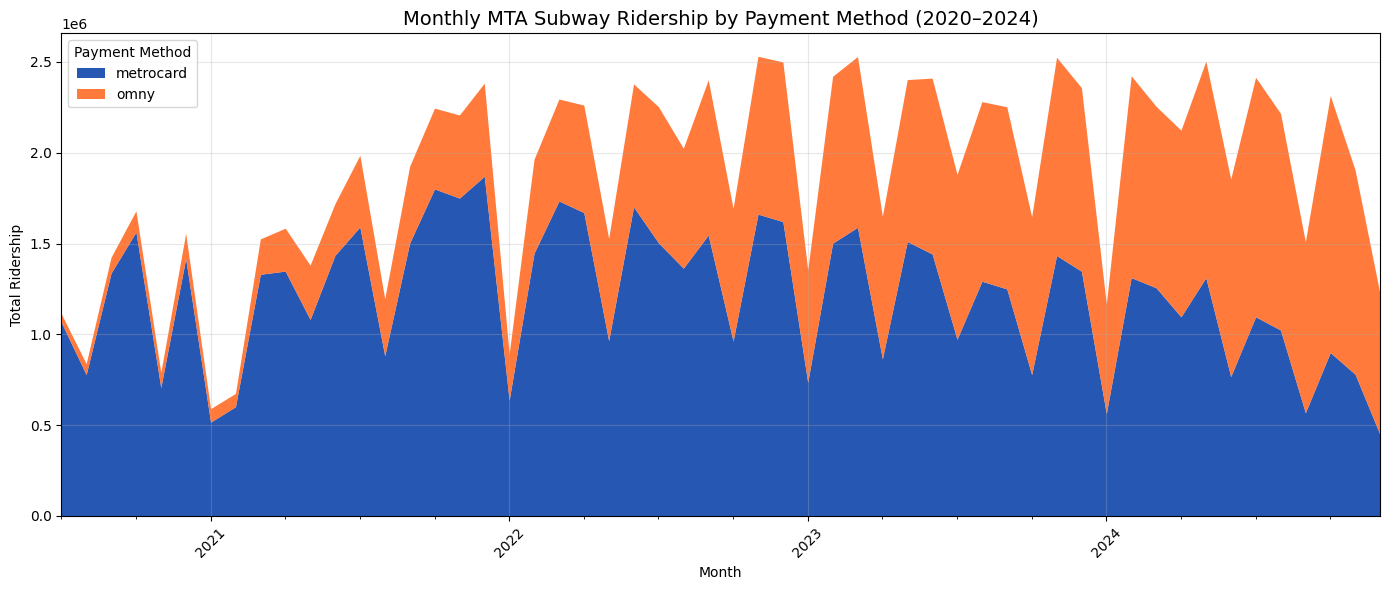

In [46]:
# grouping and pivot the data
monthly_usage = df.groupby(['month', 'payment_method'])['ridership'].sum().reset_index()
usage_pivot = monthly_usage.pivot(index='month', columns='payment_method', values='ridership').fillna(0)

# match colors to column order
colors = [mta_colors[method] for method in usage_pivot.columns]

# plot
usage_pivot.plot.area(
    alpha=0.85,
    linewidth=0,
    figsize=(14, 6),
    color=colors
)
plt.title('Monthly MTA Subway Ridership by Payment Method (2020–2024)', fontsize=14)
plt.ylabel('Total Ridership')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

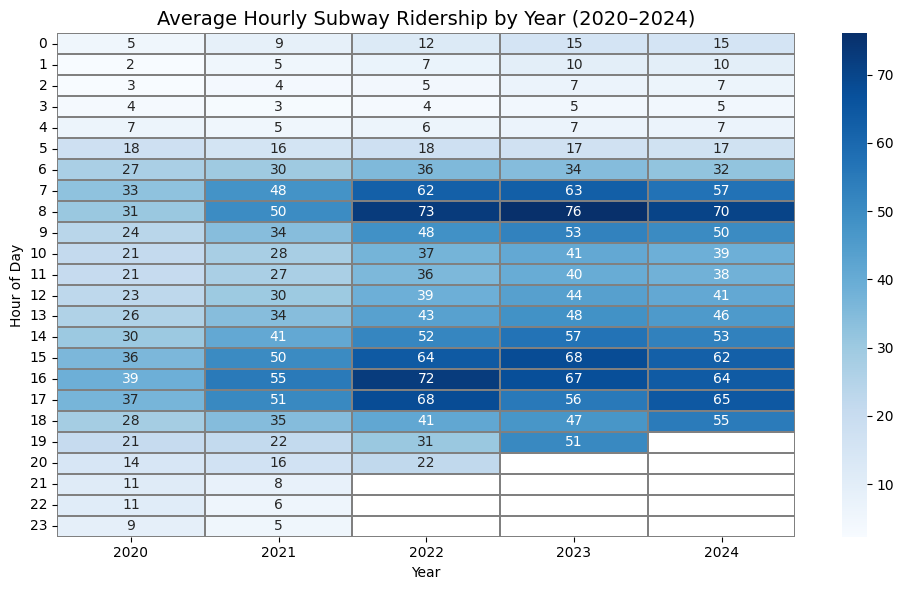

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# extract hour and year
df['hour'] = df['transit_timestamp'].dt.hour
df['year'] = df['transit_timestamp'].dt.year

# group by year and hour, then average ridership
hourly_avg = df.groupby(['year', 'hour'])['ridership'].mean().reset_index()

# pivot for heatmap
hourly_pivot = hourly_avg.pivot(index='hour', columns='year', values='ridership')

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_pivot, cmap='Blues', linewidths=0.3, linecolor='gray', annot=True, fmt=".0f")
plt.title('Average Hourly Subway Ridership by Year (2020–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Hour of Day')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show() 

The blank cells at the bottom of the heatmap for hours 21–23 in years 2022–2024 likely indicate that there were no ridership records available for those specific hour-year combinations. This could be due to missing data from the API, extremely low or unrecorded late-night ridership, or those rows being dropped during data cleaning. As a result, the heatmap leaves these cells blank instead of plotting zero values, accurately reflecting data absence rather than zero activity.

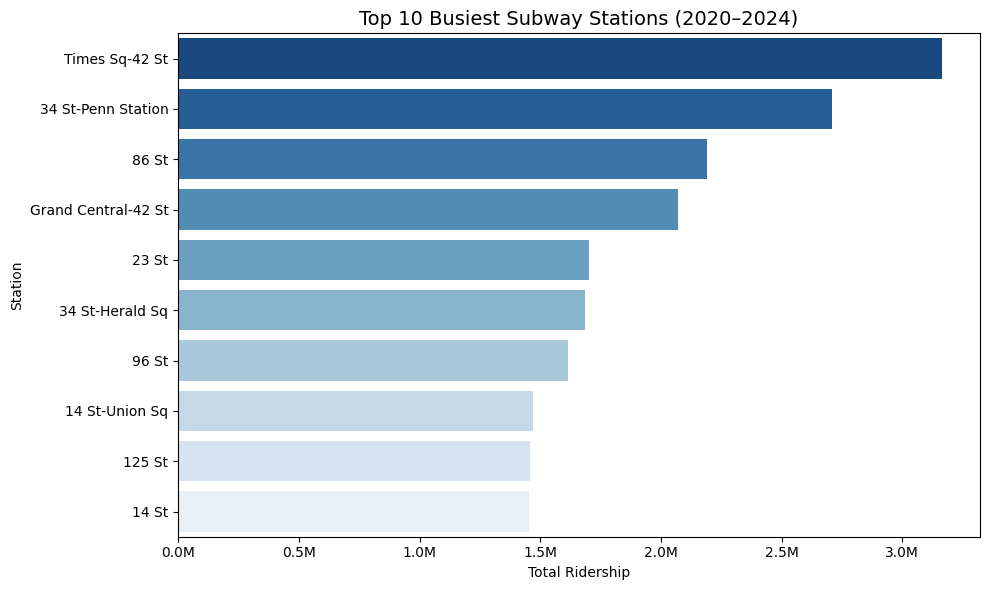

In [67]:
# group by cleaned station name
df['station_clean'] = df['station_complex'].str.split('(').str[0].str.strip()
top_stations = df.groupby('station_clean')['ridership'].sum().reset_index()

# get top 10
top_10 = top_stations.sort_values(by='ridership', ascending=False).head(10)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10,
    y='station_clean',
    x='ridership',
    hue='station_clean',
    dodge=False,
    palette='Blues_r',
    legend=False
)
plt.title('Top 10 Busiest Subway Stations (2020–2024)', fontsize=14)
plt.xlabel('Total Ridership')
plt.ylabel('Station')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.grid(False)
plt.tight_layout()
plt.show()

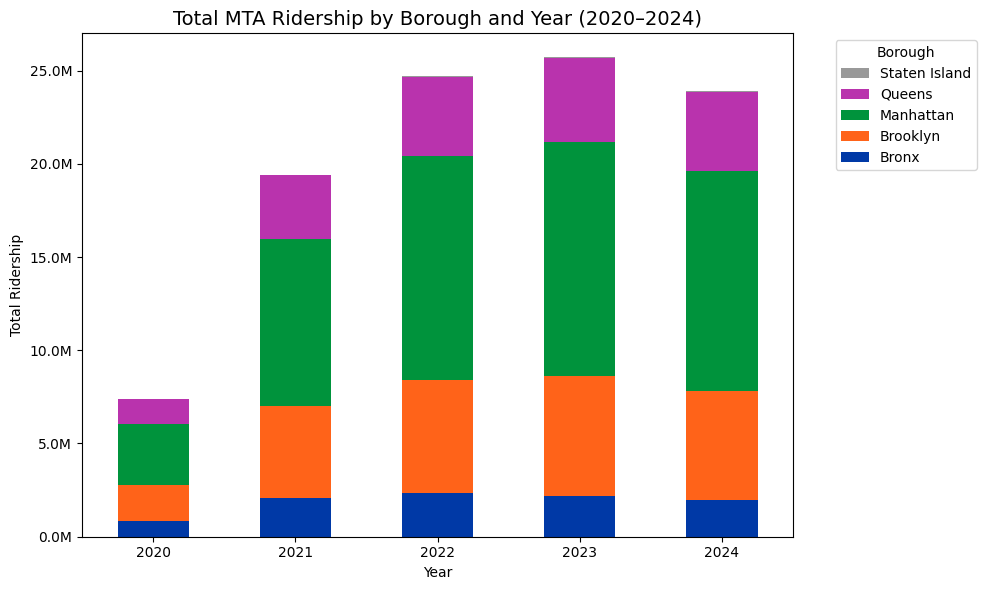

In [71]:
# xtract year from timestamp
df['year'] = df['transit_timestamp'].dt.year

# group by borough and year
borough_year = df.groupby(['year', 'borough'])['ridership'].sum().reset_index()
pivot_borough = borough_year.pivot(index='year', columns='borough', values='ridership').fillna(0)

# MTA-inspired colors -> Manhattan, Brooklyn, Queens, Bronx, Staten Island
colors = ['#0039A6', '#FF6319', '#00933C', '#B933AD', '#999999']  

# plot stacked bar
pivot_borough.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors
)

plt.title('Total MTA Ridership by Borough and Year (2020–2024)', fontsize=14)
plt.ylabel('Total Ridership')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.grid(False)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left', reverse=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

In [72]:
# Tableau dataset
import pandas as pd
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], errors='coerce')
df['station_clean'] = df['station_complex'].str.split('(').str[0].str.strip()

# time-based features
df['hour'] = df['transit_timestamp'].dt.hour
df['day_of_week'] = df['transit_timestamp'].dt.day_name()   
df['month'] = df['transit_timestamp'].dt.month              
df['year'] = df['transit_timestamp'].dt.year

# columns to keep for Tableau
final_columns = [
    'transit_timestamp',
    'station_clean',
    'borough',
    'payment_method',
    'fare_class_category',
    'ridership',
    'hour',
    'day_of_week',
    'month',
    'year'
]
# Filter and drop any rows with null values
tableau_df = df[final_columns].dropna()

# CSV
tableau_df.to_csv('mta_ridership_tableau_ready.csv', index=False)
print("✅ Exported: mta_ridership_tableau_ready.csv")

✅ Exported: mta_ridership_tableau_ready.csv
